In [1]:
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
import numpy as np

In [2]:
dataset = read_csv('select.csv',',', index_col=['sales_date'], parse_dates=['sales_date'], dayfirst=True)

In [3]:
dataset.head()

,revenue
sales_date,
2017-01-01,4409
2017-01-02,5458
2017-01-03,5902
2017-01-04,5487
2017-01-05,5482


In [4]:
rvn = dataset.revenue;
rvn.head()

sales_date
2017-01-01    4409
2017-01-02    5458
2017-01-03    5902
2017-01-04    5487
2017-01-05    5482
Name: revenue, dtype: int64

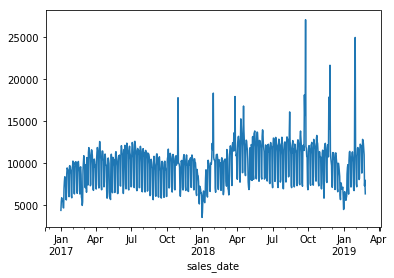

In [5]:
rvn.plot()

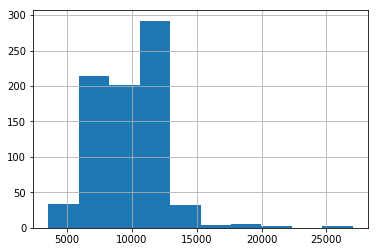

In [6]:
result = rvn.describe()
rvn.hist()

In [7]:
result

count      786.000000
mean      9840.316794
std       2595.042368
min       3573.000000
25%       7444.250000
50%      10301.000000
75%      11540.750000
max      27034.000000
Name: revenue, dtype: float64

In [8]:
print ('V = %f' % (result['std']/result['mean']))


V = 0.263715


In [9]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(rvn)
a = np.vstack([jb_test])
result = SimpleTable(a, row)
print (result)

     JB           p-value            skew         kurtosis  
------------------------------------------------------------
591.77392085 3.14721070874e-129 0.785178990278 6.95011499967
------------------------------------------------------------


In [10]:
test = sm.tsa.adfuller(rvn)
print ('adf: ', test[0] )
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -4.04520447749
p-value:  0.0011914533596
Critical values:  {'1%': -3.4389382294377469, '5%': -2.8653304587462944, '10%': -2.5687884250020558}
единичных корней нет, ряд стационарен


In [11]:
test

(-4.0452044774862728,
 0.0011914533596038533,
 21,
 764,
 {'1%': -3.4389382294377469,
  '5%': -2.8653304587462944,
  '10%': -2.5687884250020558},
 13363.585787362956)

In [12]:
src_data_model = rvn[:'2019-02-25 00:00:00']

In [13]:
src_data_model

sales_date
2017-01-01     4409
2017-01-02     5458
2017-01-03     5902
2017-01-04     5487
2017-01-05     5482
2017-01-06     5499
2017-01-07     4738
2017-01-08     4698
2017-01-09     7008
2017-01-10     7864
2017-01-11     8401
2017-01-12     8288
2017-01-13     7802
2017-01-14     5763
2017-01-15     5648
2017-01-16     8708
2017-01-17     9445
2017-01-18     9306
2017-01-19     9205
2017-01-20     8942
2017-01-21     6450
2017-01-22     6032
2017-01-23     9616
2017-01-24     9718
2017-01-25     9287
2017-01-26     9216
2017-01-27     8638
2017-01-28     6094
2017-01-29     5899
2017-01-30     9433
              ...  
2019-01-27     6755
2019-01-28    10416
2019-01-29    21047
2019-01-30    24929
2019-01-31    11022
2019-02-01    10702
2019-02-02     7546
2019-02-03     7206
2019-02-04    10840
2019-02-05    11797
2019-02-06    11868
2019-02-07    11667
2019-02-08    11321
2019-02-09     8066
2019-02-10     8209
2019-02-11    11771
2019-02-12    12265
2019-02-13    12166
2019-02-1

In [14]:
model = sm.tsa.ARIMA(src_data_model, order=(1,1,1), freq='D').fit(full_output=True, disp=0)

In [15]:
print (model.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.revenue   No. Observations:                  785
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7116.699
Method:                       css-mle   S.D. of innovations           2091.680
Date:                Tue, 12 Mar 2019   AIC                          14241.399
Time:                        15:29:56   BIC                          14260.062
Sample:                    01-02-2017   HQIC                         14248.575
                         - 02-25-2019                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.9957      4.240      0.707      0.480      -5.314      11.305
ar.L1.D.revenue     0.5207      0.034     15.262      0.000       0.454       0.588
ma.L1.D.revenue    -0.9743      

In [16]:
pred = model.predict('2019-02-01','2019-03-31', typ='levels')

In [17]:
trn = rvn['2019-01-01':]

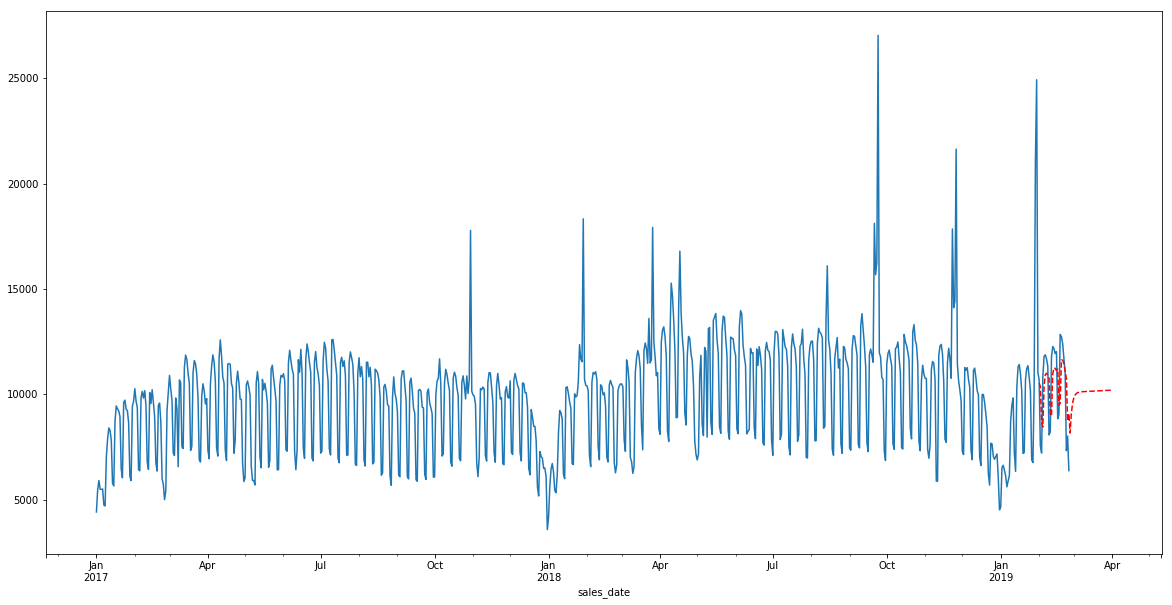

In [18]:
rvn.plot(figsize=(20,10))
pred.plot(style='r--')

In [19]:
pred

2019-02-01    10529.442657
2019-02-02    10368.684768
2019-02-03     8654.131507
2019-02-04     8441.281114
2019-02-05    10396.708453
2019-02-06    10932.485901
2019-02-07    10994.950895
2019-02-08    10909.004040
2019-02-09    10740.864832
2019-02-10     8978.561422
2019-02-11     9034.670270
2019-02-12    10961.287679
2019-02-13    11253.486962
2019-02-14    11226.837633
2019-02-15    11123.465609
2019-02-16    11193.729040
2019-02-17     9475.954600
2019-02-18     9571.236613
2019-02-19    11634.803154
2019-02-20    11611.341034
2019-02-21    11461.271182
2019-02-22    11103.298989
2019-02-23    10745.769146
2019-02-24     8734.490956
2019-02-25     9077.661206
2019-02-26     8156.053354
2019-02-27     9086.485813
2019-02-28     9572.418685
2019-03-01     9826.890630
2019-03-02     9960.835666
2019-03-03    10032.019633
2019-03-04    10070.522499
2019-03-05    10092.007582
2019-03-06    10104.631123
2019-03-07    10112.640259
2019-03-08    10118.246571
2019-03-09    10122.601679
2

In [1]:
print ("cdc")

cdc
